In [124]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import os
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

df = pd.read_csv("CleanedData_AllPasses_discretized.csv")

relevant_columns = ['passInHull', 'receiverinHull', 'receiverIsOpen', 'isAlleyOOp', 'Success', 'HullArea_cluster_centroid', 'PassDist_cluster_centroid', 'ShotClock_cluster_centroid']
categorical_columns = ['passInHull', 'receiverinHull', 'receiverIsOpen', 'isAlleyOOp', 'Success']

for col in categorical_columns:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print("encoded", col)

df = df[relevant_columns]
df.head()

encoded passInHull
encoded receiverinHull
encoded receiverIsOpen
encoded isAlleyOOp
encoded Success


,passInHull,receiverinHull,receiverIsOpen,isAlleyOOp,Success,HullArea_cluster_centroid,PassDist_cluster_centroid,ShotClock_cluster_centroid
0,0,1,0,0,0,132.771380,18.013948,22.610983
1,0,0,1,0,0,132.771380,53.705494,22.610983
2,1,0,0,0,0,132.771380,18.013948,22.610983
3,0,1,0,0,0,132.771380,53.705494,2.744672
4,0,1,0,0,0,62.224463,18.013948,22.610983


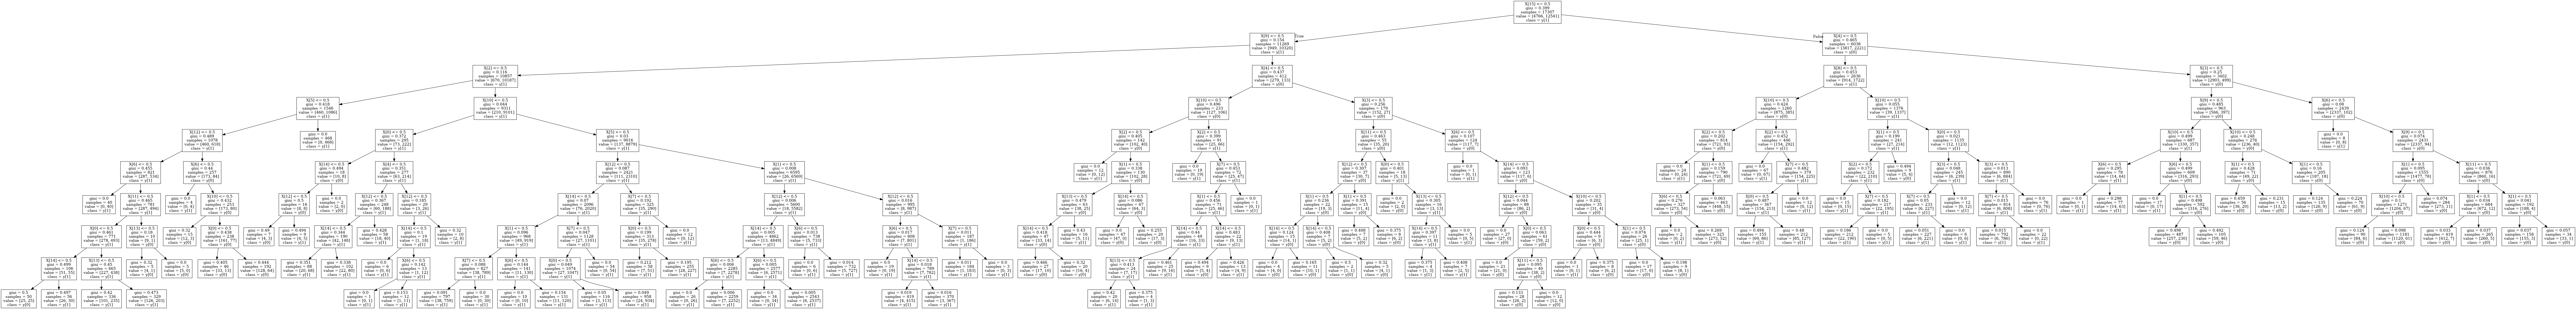

In [94]:
X = df.drop(["Success"], axis=1)
y = df[["Success"]]

enc = OneHotEncoder(sparse=False)
X = enc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

clf = tree.DecisionTreeClassifier(random_state=7)
clf = clf.fit(X_train, y_train)
tree.export_graphviz(clf, out_file='tree.dot', class_names=True)
os.system("dot -Tpng tree.dot -o tree.png")

Image(filename='tree.png')

In [102]:
print(clf.score(X_test, y_test))

confusion_matrix(y_test, clf.predict(X_test))

0.926099706745


array([[1946,  324],
       [ 306, 5949]])

In [103]:
# Untuned SVM, for comparison

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train.values.ravel())
print(svm_clf.score(X_test, y_test))
confusion_matrix(y_test, svm_clf.predict(X_test))

0.920469208211


array([[1764,  506],
       [ 172, 6083]])

In [121]:
params = {'criterion':('gini', 'entropy'), 
          'max_depth':[6, 12], 
          'max_features': [5,16], 
          'min_samples_leaf': [1,10], 
          'min_samples_split': [2, 5]}
# different score function?
gs = GridSearchCV(tree.DecisionTreeClassifier(), params)
gs_res = gs.fit(X_train, y_train)

In [122]:
gs_res.best_estimator_.score(X_test, y_test)

0.92621700879765401

In [126]:
cross_val_score(clf, X_test, y_test, cv=10).mean()

0.92563212412419027